# Best Neighborhoods by Libraries

In [44]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [45]:
libraries = pd.read_csv("libraries.csv")
libraries.head(50)

,_id,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,...,ThOpen,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon
0,2,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613
1,3,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741
2,4,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427
3,5,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547
4,6,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,...,08:30:00,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112
5,7,CLP06,EAST LIBERTY LIBRARY,130 SOUTH WHITFIELD ST,PITTSBURGH,PA,15206-3806,Allegheny,(412) 363-8232,40000,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.460963,-79.926502
6,8,CLP07,HAZELWOOD LIBRARY,5006 SECOND AVE,PITTSBURGH,PA,15207-1625,Allegheny,(412) 421-2517,7000,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.409805,-79.943849
7,9,CLP08,HILL DISTRICT LIBRARY,2177 CENTRE AVE,PITTSBURGH,PA,15219-6316,Allegheny,(412) 281-3753,8333,...,10:00:00,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.445471,-79.976706
8,10,CLP09,HOMEWOOD LIBRARY,7101 HAMILTON AVE,PITTSBURGH,PA,15208-2847,Allegheny,(412) 731-3080,28776,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.455284,-79.899213
9,11,CLP10,KNOXVILLE LIBRARY,400 BROWNSVILLE RD,PITTSBURGH,PA,15210-2251,Allegheny,(412) 381-6543,6700,...,10:00:00,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.413186,-79.989149


# The best neighborhoods would be the ones that have libraries open for the most amount of hours. If we want to compare neighborhoods, we can order this information by zip code.

In [46]:
import csv

with open('libraries.csv') as f:
    data = [row for row in csv.reader(f)]
    zip_codes = []
    for row in data[1:]: # skip the header row using a list slice
        zip_codes.append(row[6])

print(zip_codes)

['15212-4704', '15216-3130', '15226-2102', '15210-3907', '15222-2506', '15206-3806', '15207-1625', '15219-6316', '15208-2847', '15210-2251', '15201-2898', '15213-1321', '15213-4080', '15211-1549', '15204-1724', '15203-2107', '15217-1601', '15220-5422', '15212-2335']


In [47]:
# load data
lib_data = pd.read_csv("libraries.csv",index_col="_id")
first_five_digits = lib_data['Zip4'].str[:5]
first_five_digits.value_counts().sort_values(ascending=True)

15216    1
15226    1
15222    1
15206    1
15207    1
15219    1
15208    1
15201    1
15211    1
15204    1
15203    1
15217    1
15220    1
15212    2
15210    2
15213    2
Name: Zip4, dtype: int64

Now let's show this information in a bar graph.

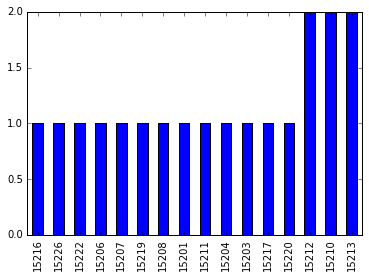

In [48]:
# load data
lib_data = pd.read_csv("libraries.csv",index_col="_id")
first_five_digits = lib_data['Zip4'].str[:5]
first_five_digits.value_counts().sort_values(ascending=True)

# Count the frequency of each value
value_counts = first_five_digits.value_counts().sort_values(ascending=True)

# Plot the frequencies as a bar plot
value_counts.plot(kind="bar")

# This is what happens when scientists do visual design
plt.style.use('classic')
value_counts.plot.bar(stacked=True)

# Show the plot
plt.show()

From this, we can see there are a couple neighborhoods that have multiple libraries. They are the neighborhoods with zip codes: 15212, 15210, and 15213. Perry South, St. Clair, and North Oakland.

# Next, we want to sort by the libraries that are open on saturdays and sundays.

In [49]:
# concatinate two series together
ser1 = lib_data['SuOpen']
ser2 = lib_data['Zip4'].str[:5]

# note the Series are passed as a list
hours = pd.concat([ser1, ser2], axis=1)
print(pd.concat([ser1, ser2], axis=1))

       SuOpen   Zip4
_id                 
2    12:00:00  15212
3         NaN  15216
4         NaN  15226
5         NaN  15210
6         NaN  15222
7         NaN  15206
8         NaN  15207
9         NaN  15219
10        NaN  15208
11        NaN  15210
12        NaN  15201
13        NaN  15213
14   12:00:00  15213
15        NaN  15211
16        NaN  15204
17   12:00:00  15203
18   12:00:00  15217
19        NaN  15220
20        NaN  15212


Now let's show this with a visualization.

SuOpen    Zip4 
12:00:00  15203    1
          15212    1
          15213    1
          15217    1
dtype: int64

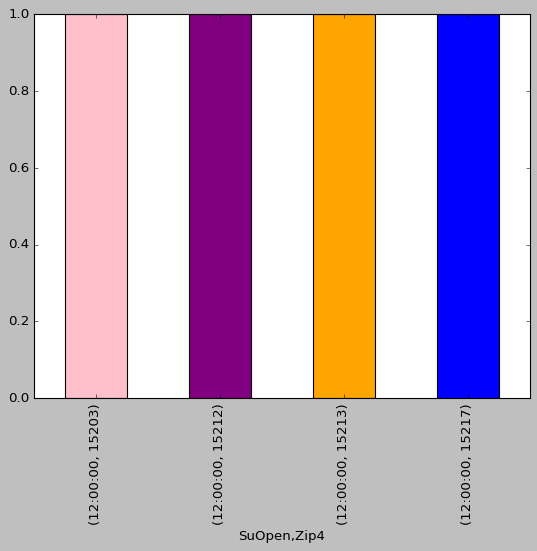

In [50]:
# Count the frequency of each value
hours_counts = hours.value_counts().sort_values(ascending=True)
hours_counts.droplevel('SuOpen')
display(hours_counts)

# Plot the frequencies as a bar plot
hours_counts.plot(kind="bar", color=["pink", "purple", "orange", "blue"])

# Show the plot
plt.show()



From this, we see that the only neighborhoods that have libraries open on Sundays, are 15212, 15213, 15203, and 15217. Perry South, North Oakland, South Side Slopes, and Squirrel Hill South, respectively.

# Conclusion

From this data, we can say the best neighborhoods are Perry South, North Oakland, South Slopes Slopes, Squirrel Hill South, and St. Clair. Recognizing that Perry South and North Oakland appeared for both categories of data.

Link to original WPRDC: https://data.wprdc.org/dataset/libraries